# Import supporting package

In [1]:
import xarray as xr
import numpy as np

from uncertainties import ufloat
from uncertainties import unumpy as unp
from uncertainties import umath

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18

from DataContainer.ReadData import read_hdf5_file
from Analyser.ImagingAnalyser import ImageAnalyser
from Analyser.FitAnalyser import FitAnalyser
from ToolFunction.ToolFunction import *

from ToolFunction.HomeMadeXarrayFunction import errorbar, dataarray_plot_errorbar
xr.plot.dataarray_plot.errorbar = errorbar
xr.plot.accessor.DataArrayPlotAccessor.errorbar = dataarray_plot_errorbar

imageAnalyser = ImageAnalyser()

%matplotlib notebook

## Start a client for parallel computing

In [2]:
from dask.distributed import Client
client = Client(n_workers=6, threads_per_worker=10, processes=True, memory_limit='10GB')
client

<Client: 'tcp://127.0.0.1:60950' processes=6 threads=60, memory=55.88 GiB>

## Set global path for experiment

In [5]:
groupList = [
    "images/MOT_3D_Camera/in_situ_absorption",
    "images/ODT_1_Axis_Camera/in_situ_absorption",
    "images/ODT_2_Axis_Camera/in_situ_absorption",
]

dskey = {
    "images/MOT_3D_Camera/in_situ_absorption": "camera_0",
    "images/ODT_1_Axis_Camera/in_situ_absorption": "camera_1",
    "images/ODT_2_Axis_Camera/in_situ_absorption": "camera_2",
}


In [6]:
img_dir = 'C:/Users/control/DyLab/Experiments/DyBEC/'
SequenceName = "Repetition_scan" + "/"
folderPath = img_dir + SequenceName + '2023/' + get_date()

# Repetition Scans

## scan MOT freq - Z Comp 0

The detected scaning axes and values are: /n
{'initial_freq': array([100.75, 100.98, 101.21, 101.44, 101.67, 101.9 , 102.13, 102.36,
       102.59, 102.82]), 'runs': array([0., 1., 2.])}


<IPython.core.display.Javascript object>


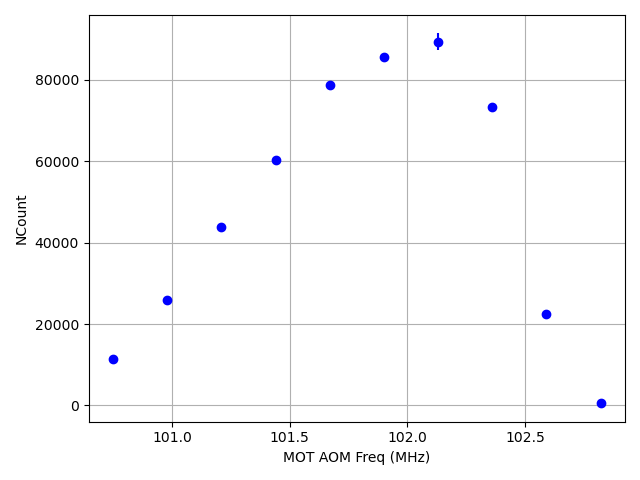

In [7]:
shotNum = "0000"
filePath = folderPath + "/" + shotNum + "/*.h5"

dataSetDict = {
    dskey[groupList[i]]: read_hdf5_file(filePath, groupList[i])
    for i in range(len(groupList))
}

dataSet = dataSetDict["camera_1"]

print_scanAxis(dataSet)

scanAxis = get_scanAxis(dataSet)

auto_rechunk(dataSet)

dataSet = imageAnalyser.get_absorption_images(dataSet)

imageAnalyser.center = (310, 825)
imageAnalyser.span = (550, 1200)
imageAnalyser.fraction = (0.1, 0.1)

dataSet_cropOD = imageAnalyser.crop_image(dataSet.OD)
dataSet_cropOD = imageAnalyser.substract_offset(dataSet_cropOD).load()

Ncount = imageAnalyser.get_Ncount(dataSet_cropOD)
Ncount_mean = Ncount.mean(dim='runs')
Ncount_std = Ncount.std(dim='runs')

fig = plt.figure()
ax = fig.gca()
Ncount_mean.plot.errorbar(ax=ax, yerr = Ncount_std, fmt='ob')
plt.xlabel('MOT AOM Freq (MHz)')
plt.ylabel('NCount')
plt.tight_layout()
plt.grid(visible=1)
plt.show()

## scan Push freq

The detected scaning axes and values are: /n
{'push_freq': array([100.5 , 100.85, 101.2 , 101.55, 101.9 , 102.25, 102.6 , 102.95,
       103.3 , 103.65]), 'runs': array([0., 1., 2.])}


<IPython.core.display.Javascript object>


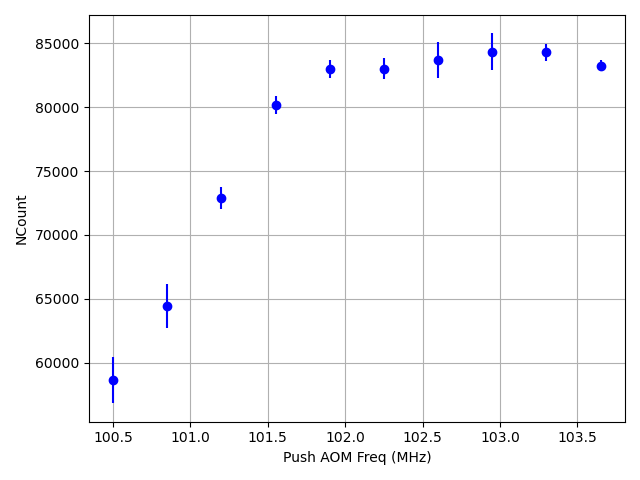

In [9]:
shotNum = "0001"
filePath = folderPath + "/" + shotNum + "/*.h5"

dataSetDict = {
    dskey[groupList[i]]: read_hdf5_file(filePath, groupList[i])
    for i in range(len(groupList))
}

dataSet = dataSetDict["camera_1"]

print_scanAxis(dataSet)

scanAxis = get_scanAxis(dataSet)

auto_rechunk(dataSet)

dataSet = imageAnalyser.get_absorption_images(dataSet)

imageAnalyser.center = (310, 825)
imageAnalyser.span = (550, 1200)
imageAnalyser.fraction = (0.1, 0.1)

dataSet_cropOD = imageAnalyser.crop_image(dataSet.OD)
dataSet_cropOD = imageAnalyser.substract_offset(dataSet_cropOD).load()

Ncount = imageAnalyser.get_Ncount(dataSet_cropOD)
Ncount_mean = Ncount.mean(dim='runs')
Ncount_std = Ncount.std(dim='runs')

fig = plt.figure()
ax = fig.gca()
Ncount_mean.plot.errorbar(ax=ax, yerr = Ncount_std, fmt='ob')
plt.xlabel('Push AOM Freq (MHz)')
plt.ylabel('NCount')
plt.tight_layout()
plt.grid(visible=1)
plt.show()

## scan cMOT final Amp

In [ ]:
shotNum = "0002"
filePath = folderPath + "/" + shotNum + "/*.h5"

dataSetDict = {
    dskey[groupList[i]]: read_hdf5_file(filePath, groupList[i])
    for i in range(len(groupList))
}

dataSet = dataSetDict["camera_1"]

print_scanAxis(dataSet)

scanAxis = get_scanAxis(dataSet)

auto_rechunk(dataSet)

dataSet = imageAnalyser.get_absorption_images(dataSet)

imageAnalyser.center = (306, 874)
imageAnalyser.span = (550, 500)
imageAnalyser.fraction = (0.1, 0.1)

dataSet_cropOD = imageAnalyser.crop_image(dataSet.OD)
dataSet_cropOD = imageAnalyser.substract_offset(dataSet_cropOD).load()

Ncount = imageAnalyser.get_Ncount(dataSet_cropOD)
Ncount_mean = Ncount.mean(dim='runs')
Ncount_std = Ncount.std(dim='runs')

fig = plt.figure()
ax = fig.gca()
Ncount_mean.plot.errorbar(ax=ax, yerr = Ncount_std, fmt='ob')
plt.xlabel('cMOT final Amp (%)')
plt.ylabel('NCount')
plt.tight_layout()
plt.grid(visible=1)
plt.show()

## scan Z comp current

In [ ]:
shotNum = "0003"
filePath = folderPath + "/" + shotNum + "/*.h5"

dataSetDict = {
    dskey[groupList[i]]: read_hdf5_file(filePath, groupList[i])
    for i in range(len(groupList))
}

dataSet = dataSetDict["camera_1"]

print_scanAxis(dataSet)

scanAxis = get_scanAxis(dataSet)

auto_rechunk(dataSet)

dataSet = imageAnalyser.get_absorption_images(dataSet)

imageAnalyser.center = (310, 825)
imageAnalyser.span = (550, 1200)
imageAnalyser.fraction = (0.1, 0.1)

dataSet_cropOD = imageAnalyser.crop_image(dataSet.OD)
dataSet_cropOD = imageAnalyser.substract_offset(dataSet_cropOD).load()

Ncount = imageAnalyser.get_Ncount(dataSet_cropOD)
Ncount_mean = Ncount.mean(dim='runs')
Ncount_std = Ncount.std(dim='runs')

fig = plt.figure()
ax = fig.gca()
Ncount_mean.plot.errorbar(ax=ax, yerr = Ncount_std, fmt='ob')
plt.xlabel('MOT AOM Freq (MHz)')
plt.ylabel('NCount')
plt.tight_layout()
plt.grid(visible=1)
plt.show()

# Evaporative Cooling

In [ ]:
img_dir = 'C:/Users/control/DyLab/Experiments/DyBEC/'
SequenceName = "Evaporative_Cooling" + "/"
folderPath = img_dir + SequenceName + get_date()

In [ ]:
l = list(np.arange(120, 151, 1))
# l = np.logspace(np.log10(100e-3), np.log10(20), num=20)

l = [round(item, 7) for item in l]
#random.shuffle(l)

print(l)
print(len(l))
np.mean(l)

## ODT 1 Calibration

In [ ]:
v_high = 2.7
"""High Power"""
P_arm1_high = 5.776 * v_high - 0.683

v_mid = 0.2076
"""Intermediate Power"""
P_arm1_mid = 5.815 * v_mid - 0.03651

v_low = 0.0587
"""Low Power"""
P_arm1_low = 5271 * v_low - 27.5

print(round(P_arm1_high, 3))
print(round(P_arm1_mid, 3))
print(round(P_arm1_low, 3))

## ODT 2 Power Calibration

In [ ]:
v = 0.7607
P_arm2 = 2.302 * v - 0.06452
print(round(P_arm2, 3))